<a href="https://colab.research.google.com/github/DGkurnia/imgclasi/blob/main/reference_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: Driver Behaviour Dataset
- **Nama:** Adindra Vickar Ega
- **Email:** adindravickar@gmail.com
- **ID Dicoding:** mahega_0107

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Install tensorflowjs
#!pip install tensorflowjs

import tensorflow as tf
import tensorflowjs as tfjs

# Verify TensorFlow version
print(f'TensorFlow version: {tf.__version__}')

# Verify TensorFlow.js version
print(f'TensorFlow.js version: {tfjs.__version__}')


TensorFlow version: 2.18.0
TensorFlow.js version: 4.22.0


In [ ]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adagrad

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preparation

### Data Loading

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"adindravickarega","key":"78515c9810b8eb8901dc216c4877a7a5"}'}

In [ ]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d robinreni/revitsone-5class

!unzip revitsone-5class.zip

Streaming output truncated to the last 5000 lines.
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37249.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37255.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37258.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37265.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37269.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37290.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37291.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37307.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37310.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_3734.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_phone/img_37366.jpg  
  inflating: revitsone-5classes/Revitsone-5classes/talking_

In [ ]:
# Dataset Paths in Google Colab
dataset_path = '/content/revitsone-5classes/Revitsone-5classes'

In [ ]:
# Validate Images Function
def validate_images(directory):
    """Validate images in the directory and log invalid files."""
    invalid_images = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify the image integrity
            except Exception as e:
                invalid_images.append(file_path)
                print(f"Invalid image found: {file_path} - {e}")
    return invalid_images

# Validate Dataset
print("Validating images in the dataset...")
invalid_images = validate_images(dataset_path)
if invalid_images:
    print(f"Found {len(invalid_images)} invalid images.")
else:
    print("All images are valid.")

Validating images in the dataset...
Invalid image found: /content/revitsone-5classes/Revitsone-5classes/turning/img_84605.jpg - cannot identify image file '/content/revitsone-5classes/Revitsone-5classes/turning/img_84605.jpg'
Invalid image found: /content/revitsone-5classes/Revitsone-5classes/turning/img_101434.jpg - cannot identify image file '/content/revitsone-5classes/Revitsone-5classes/turning/img_101434.jpg'
Invalid image found: /content/revitsone-5classes/Revitsone-5classes/turning/img_67523.jpg - cannot identify image file '/content/revitsone-5classes/Revitsone-5classes/turning/img_67523.jpg'
Invalid image found: /content/revitsone-5classes/Revitsone-5classes/turning/img_62337.jpg - cannot identify image file '/content/revitsone-5classes/Revitsone-5classes/turning/img_62337.jpg'
Invalid image found: /content/revitsone-5classes/Revitsone-5classes/turning/img_8771.jpg - cannot identify image file '/content/revitsone-5classes/Revitsone-5classes/turning/img_8771.jpg'
Invalid image 

In [ ]:
# List of invalid image paths
invalid_images = [
    "/content/revitsone-5classes/Revitsone-5classes/other_activities/img_13318.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/other_activities/img_13396.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/other_activities/img_13541.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/other_activities/img_13625.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/other_activities/img_20398.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/other_activities/img_22266.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/other_activities/img_4664.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/other_activities/img_79.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/other_activities/img_7973.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/turning/img_101434.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/turning/img_62337.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/turning/img_67523.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/turning/img_70552.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/turning/img_84605.jpg",
    "/content/revitsone-5classes/Revitsone-5classes/turning/img_8771.jpg"
]

# Remove invalid images
print("Removing invalid images...")
for image_path in invalid_images:
    try:
        if os.path.exists(image_path):
            os.remove(image_path)
            print(f"Removed: {image_path}")
        else:
            print(f"File not found (already removed): {image_path}")
    except Exception as e:
        print(f"Error removing {image_path}: {e}")

print("Invalid images removal complete.")

Removing invalid images...
Removed: /content/revitsone-5classes/Revitsone-5classes/other_activities/img_13318.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/other_activities/img_13396.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/other_activities/img_13541.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/other_activities/img_13625.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/other_activities/img_20398.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/other_activities/img_22266.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/other_activities/img_4664.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/other_activities/img_79.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/other_activities/img_7973.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/turning/img_101434.jpg
Removed: /content/revitsone-5classes/Revitsone-5classes/turning/img_62337.jpg
Removed: /content/revitsone-5classes/R

In [ ]:
# Validate Dataset
print("Validating images in the dataset...")
invalid_images = validate_images(dataset_path)
if invalid_images:
    print(f"Found {len(invalid_images)} invalid images.")
else:
    print("All images are valid.")

Validating images in the dataset...
All images are valid.


### Data Preprocessing

In [ ]:
# Define constants
IMG_HEIGHT, IMG_WIDTH = 480, 480
BATCH_SIZE = 32

#### Split Dataset

In [ ]:
# Data Augmentation and Splitting
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% test
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 8604 images belonging to 5 classes.
Found 2147 images belonging to 5 classes.


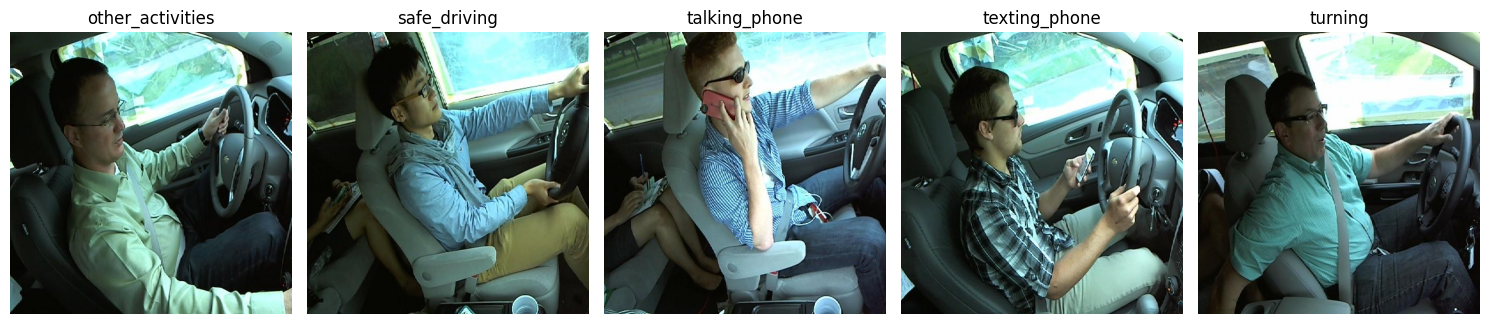

In [ ]:
# Plot sample images for each class
class_names = list(train_data.class_indices.keys())
fig, axes = plt.subplots(1, len(class_names), figsize=(15, 5))
for i, class_name in enumerate(class_names):
    for images, labels in train_data:
        class_index = np.argmax(labels, axis=1)
        if i in class_index:
            sample_image = images[class_index == i][0]
            axes[i].imshow(sample_image)
            axes[i].axis('off')
            axes[i].set_title(class_name)
            break
plt.tight_layout()
plt.show()

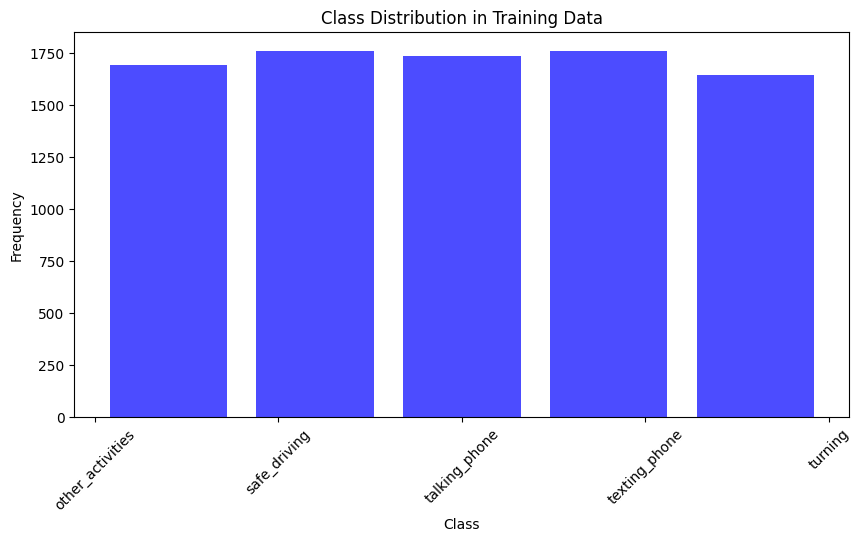

In [ ]:
# Plot class distribution
train_class_counts = train_data.labels
plt.figure(figsize=(10, 5))
plt.hist(train_class_counts, bins=len(class_names), rwidth=0.8, align='mid', color='blue', alpha=0.7)
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## Modelling

In [ ]:
# Build the model
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output of the last Conv2D layer
    Flatten(),

    # Fully connected layers with Dropout (reduce dropout to 0.1)
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),

    # Output layer for 5-class classification
    Dense(5, activation='softmax')
])

# Compile the model with Adagrad optimizer
optimizer = Adagrad(learning_rate=0.01)  # Starting learning rate for Adagrad
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 480, 480, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 240, 240, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 240, 240, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 460800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 460800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      58,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,084,357 (225.39 MB)

 Trainable params: 59,084,357 (225.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set up ReduceLROnPlateau to reduce the learning rate if the validation accuracy doesn't improve
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',       # Monitor the validation accuracy
    factor=0.5,                   # Reduce learning rate by this factor
    patience=3,                   # Number of epochs with no improvement to wait before reducing
    min_lr=1e-6,                  # Minimum learning rate, preventing it from going too low
    verbose=1                      # Print a message when learning rate is reduced
)

# Custom Callback to Stop Training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
# Modify EarlyStopping to print message when stopping
class EarlyStoppingWithMessage(EarlyStopping):
    def on_epoch_end(self, epoch, logs=None):
        super().on_epoch_end(epoch, logs)
        if self.stopped_epoch > 0:
            print(f"\nTraining stopped at epoch {self.stopped_epoch} with validation accuracy: {logs.get('val_accuracy')}")
# Use the modified EarlyStopping
early_stopping_with_message = EarlyStoppingWithMessage(monitor='val_accuracy', patience=15, restore_best_weights=True)

class EarlyStoppingByAccuracy(Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        if train_acc > 0.95 and val_acc > 0.95:
            print("\nStopping training as both training and validation accuracy exceeded 95%.")
            self.model.stop_training = True

In [ ]:
EPOCHS = 40

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stopping_with_message, lr_scheduler, EarlyStoppingByAccuracy()]
)

Epoch 1/40


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-15-1636efe56f6e>", line 4, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_1692]

## Evaluasi dan Visualisasi

In [ ]:
# Evaluate the model
train_loss, train_acc = model.evaluate(train_data)
val_loss, val_acc = model.evaluate(val_data)
print(f"Training Accuracy: {train_acc*100:.2f}%, Validation Accuracy: {val_acc*100:.2f}%")

In [ ]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step


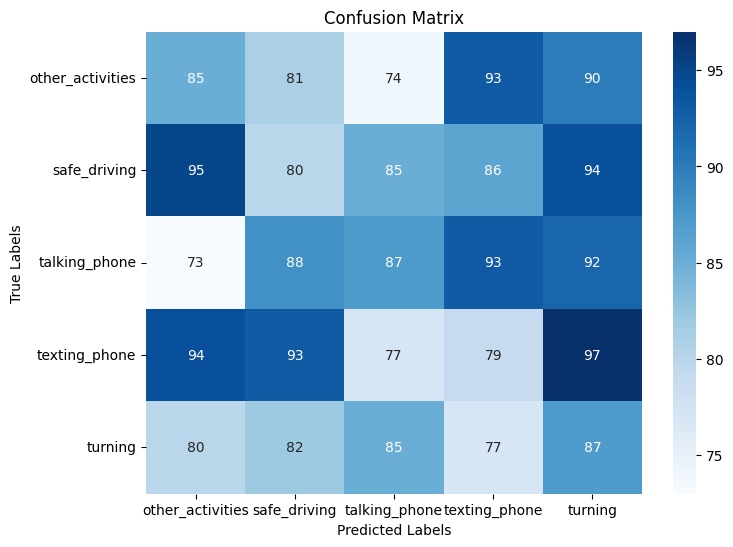

In [ ]:
# Get the true labels from the validation data
true_labels = val_data.classes

# Get the predicted labels from the model
predictions = model.predict(val_data, verbose=1)  # Remove steps argument

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Konversi Model

**SavedModel**

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

NameError: name 'model' is not defined

In [ ]:
# Path to the directory you want to zip
export_dir = '/content/saved_model/'

# Path to save the zipped file
zip_file = '/content/saved_model.zip'

# Zip the directory
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', export_dir)

# Download the zip file
files.download(zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**TFJS**

In [ ]:
#model.save("model.h5")

# Install tensorflowjs
!pip install tensorflowjs

# Convert model.h5 to tensorflowjs model
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 110.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully un

2025-01-24 10:32:22.831896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737714742.857214   15324 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737714742.866301   15324 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2025-01-24 10:34:48.702503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737714888.725371   15969 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737714888.732214   15969 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
# Path to the directory you want to zip
tfjs_dir = '/content/tfjs_model/'

# Path to save the zipped file
zip_file = '/content/tfjs_model.zip'

# Zip the directory
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', tfjs_dir)

# Download the zip file
files.download(zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**TF-Lite**

In [ ]:
!nvidia-smi

Fri Jan 24 10:36:14 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0              30W /  70W |   8329MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install tensorflow==2.15.0
import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 891.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installati

TensorFlow version: 2.17.1


In [ ]:
export_dir = '/content/saved_model/'

# Convert SavedModel menjadi model.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

ValueError: For full integer quantization, a `representative_dataset` must be specified.

## Inference (Optional)

In [ ]:
# Perform inference using the saved model with TensorFlow Serving
export_dir = 'saved_model/'
# Load the saved model
loaded_model = tf.saved_model.load(export_dir)

# For inference, we need to extract the inference function from the loaded model
infer = loaded_model.signatures["serving_default"]  # Extract the default serving signature

In [ ]:
# Load a batch of validation data
val_images, val_labels = next(iter(val_data))

# Perform inference using the saved model

# The "serving_default" signature typically returns a dictionary with output tensor
predictions = infer(tf.convert_to_tensor(val_images))

# Access the output tensor within the dictionary and convert to numpy array
output_tensor = predictions['output_0']  # Access the tensor by its name
predicted_classes = np.argmax(output_tensor.numpy(), axis=1)

# Convert the one-hot encoded labels to class indices
true_classes = np.argmax(val_labels, axis=1)

#predictions = loaded_model.predict(val_images)
#predicted_classes = np.argmax(predictions, axis=1)
#true_classes = np.argmax(val_labels, axis=1)

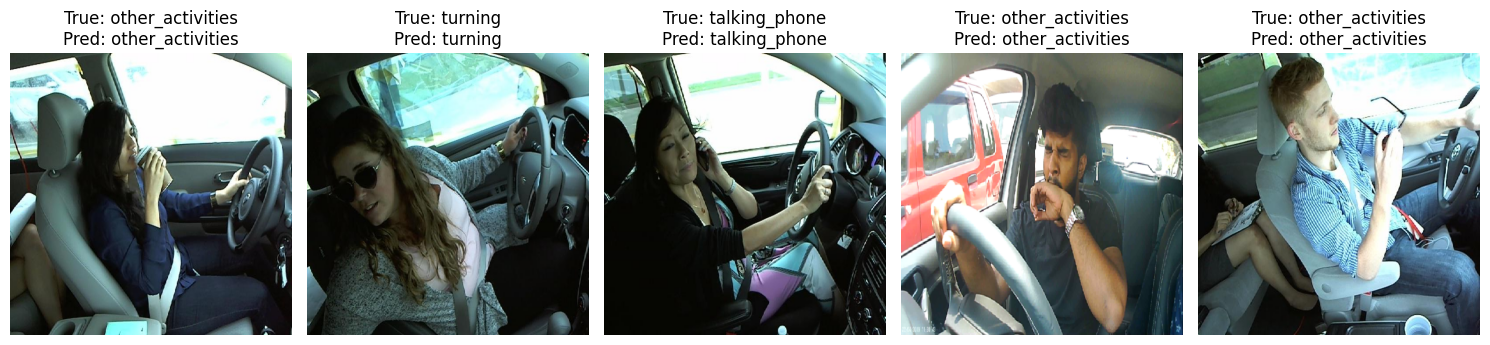

In [ ]:
# Plot some validation images with predictions
class_names = list(val_data.class_indices.keys())  # Class names from the validation data generator
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(val_images[i])
    ax.axis('off')
    ax.set_title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
plt.tight_layout()
plt.show()